# 10 minutes to pandas

In [1]:
import numpy as np
import pandas as pd

## Object creation

In [2]:
s=pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates=pd.date_range("20130101", periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df=pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD")) #index=행 columns=열

In [7]:
df

,A,B,C,D
2013-01-01,-1.241270,0.116493,-0.011506,1.199414
2013-01-02,0.649006,0.899675,-0.584971,0.102027
2013-01-03,1.047358,0.840979,-1.610060,0.910449
2013-01-04,-0.273391,1.267773,0.249081,-0.400576
2013-01-05,-1.651122,-0.148522,0.447652,0.415546
2013-01-06,0.255158,0.597048,0.471088,1.984915


In [8]:
df2=pd.DataFrame(
    {
            "A": 1.0,
            "B": pd.Timestamp("20130102"),
            "C": pd.Series(1, index=list(range(4)), dtype="float32"),
            "D": np.array([3] * 4, dtype="int32"),
            "E": pd.Categorical(["test", "train", "test", "train"]),
            "F": "foo",
    })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [17]:
# df2.<TAB> # noqa: E225, E999
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated

SyntaxError: invalid syntax (<ipython-input-17-ca8b4e2d67fe>, line 2)

## Viewing data

In [18]:
df.head() #안에 아무 숫자 안넣으면 상위 5개 보여줌

,A,B,C,D
2013-01-01,-1.241270,0.116493,-0.011506,1.199414
2013-01-02,0.649006,0.899675,-0.584971,0.102027
2013-01-03,1.047358,0.840979,-1.610060,0.910449
2013-01-04,-0.273391,1.267773,0.249081,-0.400576
2013-01-05,-1.651122,-0.148522,0.447652,0.415546


In [21]:
df.tail(3) #끝에 3개

,A,B,C,D
2013-01-04,-0.273391,1.267773,0.249081,-0.400576
2013-01-05,-1.651122,-0.148522,0.447652,0.415546
2013-01-06,0.255158,0.597048,0.471088,1.984915


In [22]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [23]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [24]:
df.to_numpy()

array([[-1.24127045,  0.11649325, -0.01150586,  1.19941383],
       [ 0.64900623,  0.89967535, -0.58497115,  0.1020265 ],
       [ 1.047358  ,  0.84097873, -1.61005992,  0.91044919],
       [-0.27339134,  1.26777261,  0.24908058, -0.40057582],
       [-1.65112223, -0.14852192,  0.44765246,  0.41554633],
       [ 0.25515792,  0.59704793,  0.47108797,  1.98491519]])

In [25]:
df2.to_numpy() #DataFrame.to_numpy() does not include the index or column labels in the output.

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [26]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.202377,0.595574,-0.173119,0.701963
std,1.065761,0.526830,0.804879,0.847873
min,-1.651122,-0.148522,-1.610060,-0.400576
25%,-0.999301,0.236632,-0.441605,0.180406
50%,-0.009117,0.719013,0.118787,0.662998
75%,0.550544,0.885001,0.398009,1.127173
max,1.047358,1.267773,0.471088,1.984915


In [27]:
df.T #데이터 전치

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.241270,0.649006,1.047358,-0.273391,-1.651122,0.255158
B,0.116493,0.899675,0.840979,1.267773,-0.148522,0.597048
C,-0.011506,-0.584971,-1.610060,0.249081,0.447652,0.471088
D,1.199414,0.102027,0.910449,-0.400576,0.415546,1.984915


In [33]:
df.sort_index(axis=1, ascending=False) #축으로 정렬

,D,C,B,A
2013-01-01,1.199414,-0.011506,0.116493,-1.241270
2013-01-02,0.102027,-0.584971,0.899675,0.649006
2013-01-03,0.910449,-1.610060,0.840979,1.047358
2013-01-04,-0.400576,0.249081,1.267773,-0.273391
2013-01-05,0.415546,0.447652,-0.148522,-1.651122
2013-01-06,1.984915,0.471088,0.597048,0.255158


In [28]:
df.sort_values(by="B") #값으로 정렬 (B열에서 작은값부터 큰 값으로 순서대로 정렬)

,A,B,C,D
2013-01-05,-1.651122,-0.148522,0.447652,0.415546
2013-01-01,-1.241270,0.116493,-0.011506,1.199414
2013-01-06,0.255158,0.597048,0.471088,1.984915
2013-01-03,1.047358,0.840979,-1.610060,0.910449
2013-01-02,0.649006,0.899675,-0.584971,0.102027
2013-01-04,-0.273391,1.267773,0.249081,-0.400576


##  Selection

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

### Getting

In [36]:
df["A"]  # df.A로 쳐도 동일하게 출력됨.

2013-01-01   -1.241270
2013-01-02    0.649006
2013-01-03    1.047358
2013-01-04   -0.273391
2013-01-05   -1.651122
2013-01-06    0.255158
Freq: D, Name: A, dtype: float64

#Selecting via [], which slices the __rows__.

In [39]:
df[0:3]

,A,B,C,D
2013-01-01,-1.241270,0.116493,-0.011506,1.199414
2013-01-02,0.649006,0.899675,-0.584971,0.102027
2013-01-03,1.047358,0.840979,-1.610060,0.910449


In [38]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.649006,0.899675,-0.584971,0.102027
2013-01-03,1.047358,0.840979,-1.610060,0.910449
2013-01-04,-0.273391,1.267773,0.249081,-0.400576


### Selection by label

In [43]:
df.head(6)

,A,B,C,D
2013-01-01,-1.241270,0.116493,-0.011506,1.199414
2013-01-02,0.649006,0.899675,-0.584971,0.102027
2013-01-03,1.047358,0.840979,-1.610060,0.910449
2013-01-04,-0.273391,1.267773,0.249081,-0.400576
2013-01-05,-1.651122,-0.148522,0.447652,0.415546
2013-01-06,0.255158,0.597048,0.471088,1.984915


#### df.loc[   ] 
For getting a cross section __using a label__:

In [41]:
df.loc[dates[0]] #dates의 0번째 데이터

A   -1.241270
B    0.116493
C   -0.011506
D    1.199414
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [44]:
df.loc[:, ["A", "B"]] #여러개의 축 선택 [(행) , (열)]

,A,B
2013-01-01,-1.241270,0.116493
2013-01-02,0.649006,0.899675
2013-01-03,1.047358,0.840979
2013-01-04,-0.273391,1.267773
2013-01-05,-1.651122,-0.148522
2013-01-06,0.255158,0.597048


In [45]:
#Showing label slicing, both endpoints are included: [(행) , (열)]
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.649006,0.899675
2013-01-03,1.047358,0.840979
2013-01-04,-0.273391,1.267773


In [46]:
df.loc["20130102", ["A", "B"]]

A    0.649006
B    0.899675
Name: 2013-01-02 00:00:00, dtype: float64

In [47]:
df.loc[dates[0], "A"]

-1.2412704455496006

#### df.at[   ]
For getting fast access to a scalar (equivalent to the prior method):

In [48]:
df.at[dates[0], "A"]

-1.2412704455496006

### Selection by position

#### df.iloc[    ]
Select via __the position of the passed integers__:

In [49]:
df.iloc[3]  #index 3번째인 20130104의 값을 열별로 보여줌.

A   -0.273391
B    1.267773
C    0.249081
D   -0.400576
Name: 2013-01-04 00:00:00, dtype: float64

In [50]:
df.iloc[3:5, 0:2] #df.iloc[ 행, 열 ]

,A,B
2013-01-04,-0.273391,1.267773
2013-01-05,-1.651122,-0.148522


In [51]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.649006,-0.584971
2013-01-03,1.047358,-1.610060
2013-01-05,-1.651122,0.447652


In [52]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.649006,0.899675,-0.584971,0.102027
2013-01-03,1.047358,0.840979,-1.610060,0.910449


In [53]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.116493,-0.011506
2013-01-02,0.899675,-0.584971
2013-01-03,0.840979,-1.610060
2013-01-04,1.267773,0.249081
2013-01-05,-0.148522,0.447652
2013-01-06,0.597048,0.471088


In [54]:
df.iloc[1, 1] #20130102행의 B열의 값

0.8996753470530208

#### df.iat[    ]
For getting fast access to a scalar (equivalent to the prior method):

In [55]:
df.iat[1, 1]

0.8996753470530208

### Boolean indexing

In [56]:
df.head(6)

,A,B,C,D
2013-01-01,-1.241270,0.116493,-0.011506,1.199414
2013-01-02,0.649006,0.899675,-0.584971,0.102027
2013-01-03,1.047358,0.840979,-1.610060,0.910449
2013-01-04,-0.273391,1.267773,0.249081,-0.400576
2013-01-05,-1.651122,-0.148522,0.447652,0.415546
2013-01-06,0.255158,0.597048,0.471088,1.984915


In [57]:
df[df["A"]>0]

,A,B,C,D
2013-01-02,0.649006,0.899675,-0.584971,0.102027
2013-01-03,1.047358,0.840979,-1.610060,0.910449
2013-01-06,0.255158,0.597048,0.471088,1.984915


In [58]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,0.116493,NaN,1.199414
2013-01-02,0.649006,0.899675,NaN,0.102027
2013-01-03,1.047358,0.840979,NaN,0.910449
2013-01-04,NaN,1.267773,0.249081,NaN
2013-01-05,NaN,NaN,0.447652,0.415546
2013-01-06,0.255158,0.597048,0.471088,1.984915


In [59]:
df2=df.copy()

In [61]:
df2["E"]= ["one", "one", "two", "three", "four", "three"]

In [62]:
df2

,A,B,C,D,E
2013-01-01,-1.241270,0.116493,-0.011506,1.199414,one
2013-01-02,0.649006,0.899675,-0.584971,0.102027,one
2013-01-03,1.047358,0.840979,-1.610060,0.910449,two
2013-01-04,-0.273391,1.267773,0.249081,-0.400576,three
2013-01-05,-1.651122,-0.148522,0.447652,0.415546,four
2013-01-06,0.255158,0.597048,0.471088,1.984915,three


In [63]:
df2[df2["E"].isin(["two","four"])]

,A,B,C,D,E
2013-01-03,1.047358,0.840979,-1.610060,0.910449,two
2013-01-05,-1.651122,-0.148522,0.447652,0.415546,four


### Setting

In [64]:
 s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [67]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [68]:
df["F"]=s1

In [69]:
df

,A,B,C,D,F
2013-01-01,-1.241270,0.116493,-0.011506,1.199414,NaN
2013-01-02,0.649006,0.899675,-0.584971,0.102027,1.0
2013-01-03,1.047358,0.840979,-1.610060,0.910449,2.0
2013-01-04,-0.273391,1.267773,0.249081,-0.400576,3.0
2013-01-05,-1.651122,-0.148522,0.447652,0.415546,4.0
2013-01-06,0.255158,0.597048,0.471088,1.984915,5.0


In [70]:
df.at[dates[0], "A"] = 0

In [73]:
 df.iat[0, 1] = 0

In [72]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.011506,1.199414,NaN
2013-01-02,0.649006,0.899675,-0.584971,0.102027,1.0
2013-01-03,1.047358,0.840979,-1.610060,0.910449,2.0
2013-01-04,-0.273391,1.267773,0.249081,-0.400576,3.0
2013-01-05,-1.651122,-0.148522,0.447652,0.415546,4.0
2013-01-06,0.255158,0.597048,0.471088,1.984915,5.0


In [74]:
 df.loc[:, "D"] = np.array([5] * len(df))

In [75]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.011506,5,NaN
2013-01-02,0.649006,0.899675,-0.584971,5,1.0
2013-01-03,1.047358,0.840979,-1.610060,5,2.0
2013-01-04,-0.273391,1.267773,0.249081,5,3.0
2013-01-05,-1.651122,-0.148522,0.447652,5,4.0
2013-01-06,0.255158,0.597048,0.471088,5,5.0


In [76]:
df2

,A,B,C,D,E
2013-01-01,-1.241270,0.116493,-0.011506,1.199414,one
2013-01-02,0.649006,0.899675,-0.584971,0.102027,one
2013-01-03,1.047358,0.840979,-1.610060,0.910449,two
2013-01-04,-0.273391,1.267773,0.249081,-0.400576,three
2013-01-05,-1.651122,-0.148522,0.447652,0.415546,four
2013-01-06,0.255158,0.597048,0.471088,1.984915,three


In [77]:
df2=df.copy()

In [78]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.011506,5,NaN
2013-01-02,0.649006,0.899675,-0.584971,5,1.0
2013-01-03,1.047358,0.840979,-1.610060,5,2.0
2013-01-04,-0.273391,1.267773,0.249081,5,3.0
2013-01-05,-1.651122,-0.148522,0.447652,5,4.0
2013-01-06,0.255158,0.597048,0.471088,5,5.0


In [79]:
df2[df2>0]=-df2

In [80]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.011506,-5,NaN
2013-01-02,-0.649006,-0.899675,-0.584971,-5,-1.0
2013-01-03,-1.047358,-0.840979,-1.610060,-5,-2.0
2013-01-04,-0.273391,-1.267773,-0.249081,-5,-3.0
2013-01-05,-1.651122,-0.148522,-0.447652,-5,-4.0
2013-01-06,-0.255158,-0.597048,-0.471088,-5,-5.0


## Missing data

### df.reindex(  ,  )

In [81]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

### df.loc[  ,  ] = a

In [86]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [88]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.011506,5,NaN,1.0
2013-01-02,0.649006,0.899675,-0.584971,5,1.0,1.0
2013-01-03,1.047358,0.840979,-1.610060,5,2.0,NaN
2013-01-04,-0.273391,1.267773,0.249081,5,3.0,NaN


### df.dropna( )
To drop any rows that have missing data.

In [89]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.649006,0.899675,-0.584971,5,1.0,1.0


### df.fillna( )
Filling missing data.

In [90]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.011506,5,5.0,1.0
2013-01-02,0.649006,0.899675,-0.584971,5,1.0,1.0
2013-01-03,1.047358,0.840979,-1.610060,5,2.0,5.0
2013-01-04,-0.273391,1.267773,0.249081,5,3.0,5.0


### pd.isna( df )
To get the boolean mask where values are nan.

In [91]:
 pd.isna(df1)  #Nan이면 True

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations    

### Stats
Operations in general exclude missing data.

#### df.mean( )
기술 통계 수행

In [93]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.011506,5,NaN
2013-01-02,0.649006,0.899675,-0.584971,5,1.0
2013-01-03,1.047358,0.840979,-1.610060,5,2.0
2013-01-04,-0.273391,1.267773,0.249081,5,3.0
2013-01-05,-1.651122,-0.148522,0.447652,5,4.0
2013-01-06,0.255158,0.597048,0.471088,5,5.0


In [94]:
df.mean() #columns를 기준으로 평균을 낸다.

A    0.004501
B    0.576159
C   -0.173119
D    5.000000
F    3.000000
dtype: float64

In [95]:
df.mean(1) #index를 기준으로 평균을 낸다.

2013-01-01    1.247124
2013-01-02    1.392742
2013-01-03    1.455655
2013-01-04    1.848692
2013-01-05    1.529602
2013-01-06    2.264659
Freq: D, dtype: float64

In [97]:
s=pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [98]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [99]:
df.sub(s, axis="index")  #sub뺄셈.. 잘 모르겠음.

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.047358,-0.159021,-2.610060,4.0,1.0
2013-01-04,-3.273391,-1.732227,-2.750919,2.0,0.0
2013-01-05,-6.651122,-5.148522,-4.552348,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [100]:
df.apply(np.cumsum) #cumsum=cumulative sum (처음부터 종점까지의 적분값)(누적합)(열 기준)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.011506,5,NaN
2013-01-02,0.649006,0.899675,-0.596477,10,1.0
2013-01-03,1.696364,1.740654,-2.206537,15,3.0
2013-01-04,1.422973,3.008427,-1.957456,20,6.0
2013-01-05,-0.228149,2.859905,-1.509804,25,10.0
2013-01-06,0.027009,3.456953,-1.038716,30,15.0


In [101]:
df.apply(lambda x: x.max() - x.min()) #열 기준

A    2.698480
B    1.416295
C    2.081148
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [104]:
 s = pd.Series(np.random.randint(0, 7, size=10))

In [105]:
s

0    2
1    3
2    6
3    1
4    1
5    2
6    1
7    3
8    2
9    0
dtype: int32

In [106]:
s.value_counts() # 각 숫자가 몇번 나왔는지

2    3
1    3
3    2
6    1
0    1
dtype: int64

### String Methods

In [107]:
 s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [113]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat
병합, 결합, 이어버리기!

In [118]:
df = pd.DataFrame(np.random.randn(10, 4))

In [120]:
df

,0,1,2,3
0,0.905880,1.094569,-0.240176,-0.110125
1,0.797047,0.427798,1.688642,1.603062
2,-2.052579,0.636860,-0.983460,0.355357
3,0.300761,-1.120086,-0.921911,-0.945196
4,-0.203815,1.026596,0.156870,1.529100
5,-0.928280,-0.161343,-0.701729,-1.095523
6,0.026233,1.114255,0.036656,-0.430973
7,-0.400726,1.294834,-0.021703,-1.176697
8,-0.355160,-1.645398,-0.301367,0.187487
9,1.582059,0.221815,-0.819439,0.682103


In [122]:
# break it into pieces
In [75]: pieces = [df[:3], df[3:7], df[7:]]

,0,1,2,3
0,0.905880,1.094569,-0.240176,-0.110125
1,0.797047,0.427798,1.688642,1.603062
2,-2.052579,0.636860,-0.983460,0.355357
3,0.300761,-1.120086,-0.921911,-0.945196
4,-0.203815,1.026596,0.156870,1.529100
5,-0.928280,-0.161343,-0.701729,-1.095523
6,0.026233,1.114255,0.036656,-0.430973
7,-0.400726,1.294834,-0.021703,-1.176697
8,-0.355160,-1.645398,-0.301367,0.187487
9,1.582059,0.221815,-0.819439,0.682103


In [123]:
 pd.concat(pieces)

,0,1,2,3
0,0.905880,1.094569,-0.240176,-0.110125
1,0.797047,0.427798,1.688642,1.603062
2,-2.052579,0.636860,-0.983460,0.355357
3,0.300761,-1.120086,-0.921911,-0.945196
4,-0.203815,1.026596,0.156870,1.529100
5,-0.928280,-0.161343,-0.701729,-1.095523
6,0.026233,1.114255,0.036656,-0.430973
7,-0.400726,1.294834,-0.021703,-1.176697
8,-0.355160,-1.645398,-0.301367,0.187487
9,1.582059,0.221815,-0.819439,0.682103


### Join
SQL style merges. See the Database style joining section.

In [124]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [125]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [126]:
left

,key,lval
0,foo,1
1,foo,2


In [127]:
right

,key,rval
0,foo,4
1,foo,5


In [128]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [129]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [130]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [131]:
left

,key,lval
0,foo,1
1,bar,2


In [132]:
right

,key,rval
0,foo,4
1,bar,5


In [133]:
 pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping
- __Splitting__ the data into groups based on some criteria

- __Applying__ a function to each group independently

- __Combining__ the results into a data structure

In [134]:
df = pd.DataFrame(
       {
           "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
           "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
           "C": np.random.randn(8),
           "D": np.random.randn(8),
       }
   )

In [135]:
df

,A,B,C,D
0,foo,one,0.074681,0.698556
1,bar,one,2.266886,0.912279
2,foo,two,-0.890268,0.031183
3,bar,three,-0.026482,-0.939261
4,foo,two,0.363703,1.547360
5,bar,two,0.385846,0.600514
6,foo,one,1.084128,0.357844
7,foo,three,-1.181100,1.040438


In [137]:
#Grouping and then applying the sum() function to the resulting groups.
df.groupby("A").sum() #A로 그룹화 & sum함수 시행

,C,D
A,,
bar,2.626250,0.573531
foo,-0.548856,3.675381


In [138]:
#Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function.
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    2.266886  0.912279
    three -0.026482 -0.939261
    two    0.385846  0.600514
foo one    1.158809  1.056400
    three -1.181100  1.040438
    two   -0.526565  1.578543

## Reshaping

### Stack ???

In [139]:
tuples = list(
        zip(
            *[
                ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
                ["one", "two", "one", "two", "one", "two", "one", "two"],
            ]
        )
    )

In [140]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [141]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [143]:
df

A         B
first second                    
bar   one     0.454231  0.518667
      two     0.769724 -0.388084
baz   one    -0.080538 -0.827181
      two     1.938120 -1.648390
foo   one    -0.364146  1.266514
      two    -0.793295 -1.245323
qux   one     1.506638  0.690964
      two    -1.440003 -2.017885

In [144]:
df2 = df[:4]

In [145]:
df2

A         B
first second                    
bar   one     0.454231  0.518667
      two     0.769724 -0.388084
baz   one    -0.080538 -0.827181
      two     1.938120 -1.648390

In [146]:
#The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()

In [147]:
stacked

first  second   
bar    one     A    0.454231
               B    0.518667
       two     A    0.769724
               B   -0.388084
baz    one     A   -0.080538
               B   -0.827181
       two     A    1.938120
               B   -1.648390
dtype: float64

In [148]:
stacked.unstack()

A         B
first second                    
bar   one     0.454231  0.518667
      two     0.769724 -0.388084
baz   one    -0.080538 -0.827181
      two     1.938120 -1.648390

In [149]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.454231  0.769724
      B  0.518667 -0.388084
baz   A -0.080538  1.938120
      B -0.827181 -1.648390

In [150]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.454231 -0.080538
       B  0.518667 -0.827181
two    A  0.769724  1.938120
       B -0.388084 -1.648390

### Pivot tables

In [152]:
df = pd.DataFrame(
     {
         "A": ["one", "one", "two", "three"] * 3,
         "B": ["A", "B", "C"] * 4,
         "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
         "D": np.random.randn(12),
         "E": np.random.randn(12),
     }
 )

In [153]:
df

,A,B,C,D,E
0,one,A,foo,-0.375625,1.026342
1,one,B,foo,1.548726,1.738620
2,two,C,foo,-0.444703,-1.247791
3,three,A,bar,0.984069,-0.069645
4,one,B,bar,0.071205,0.398205
5,one,C,bar,0.053137,0.668141
6,two,A,foo,-0.969729,-0.384523
7,three,B,foo,0.287593,0.792583
8,one,C,foo,-1.447255,1.549344
9,one,A,bar,-0.051165,0.316064


In [154]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.051165 -0.375625
      B  0.071205  1.548726
      C  0.053137 -1.447255
three A  0.984069       NaN
      B       NaN  0.287593
      C  0.467787       NaN
two   A       NaN -0.969729
      B  0.647895       NaN
      C       NaN -0.444703

## Time series

In [155]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [157]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [158]:
ts

2012-01-01 00:00:00    362
2012-01-01 00:00:01    357
2012-01-01 00:00:02    246
2012-01-01 00:00:03    308
2012-01-01 00:00:04    251
                      ... 
2012-01-01 00:01:35    167
2012-01-01 00:01:36    284
2012-01-01 00:01:37     65
2012-01-01 00:01:38    130
2012-01-01 00:01:39    299
Freq: S, Length: 100, dtype: int32

In [159]:
ts.resample("5Min").sum()

2012-01-01    25174
Freq: 5T, dtype: int32

Time zone representation: (시간대 표현)

In [160]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [164]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [165]:
ts

2012-03-06    0.175371
2012-03-07   -1.837524
2012-03-08   -0.961321
2012-03-09   -1.883111
2012-03-10    0.184029
Freq: D, dtype: float64

In [166]:
 ts_utc = ts.tz_localize("UTC")

In [168]:
ts_utc

2012-03-06 00:00:00+00:00    0.175371
2012-03-07 00:00:00+00:00   -1.837524
2012-03-08 00:00:00+00:00   -0.961321
2012-03-09 00:00:00+00:00   -1.883111
2012-03-10 00:00:00+00:00    0.184029
Freq: D, dtype: float64

Converting to another time zone: (다른 시간대로 변환)

In [169]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.175371
2012-03-06 19:00:00-05:00   -1.837524
2012-03-07 19:00:00-05:00   -0.961321
2012-03-08 19:00:00-05:00   -1.883111
2012-03-09 19:00:00-05:00    0.184029
Freq: D, dtype: float64

Converting between time span representations: (시간 범위 표현 간 변환)

In [170]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [172]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [173]:
ts

2012-01-31    0.538209
2012-02-29    1.399616
2012-03-31   -0.411149
2012-04-30   -0.665963
2012-05-31   -1.023473
Freq: M, dtype: float64

In [174]:
ps = ts.to_period() #기간

In [175]:
ps

2012-01    0.538209
2012-02    1.399616
2012-03   -0.411149
2012-04   -0.665963
2012-05   -1.023473
Freq: M, dtype: float64

In [176]:
ps.to_timestamp()  #타임스탬프

2012-01-01    0.538209
2012-02-01    1.399616
2012-03-01   -0.411149
2012-04-01   -0.665963
2012-05-01   -1.023473
Freq: MS, dtype: float64

기간과 타임 스탬프 사이를 변환하면 편리한 산술 함수를 사용할 수 있습니다. 다음 예에서는 연도가 11 월로 끝나는 분기 별 빈도를 분기 종료 다음 달의 오전 9 시로 변환합니다.

In [177]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [180]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [181]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [182]:
ts.head()

1990-03-01 09:00   -1.126780
1990-06-01 09:00   -0.933721
1990-09-01 09:00    0.091919
1990-12-01 09:00    0.542009
1991-03-01 09:00   -0.235185
Freq: H, dtype: float64

## Categoricals

In [183]:
df = pd.DataFrame(
     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
 )

In [184]:
 df["grade"] = df["raw_grade"].astype("category")
    #Convert the raw grades to a categorical data type.

In [185]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!).

In [186]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default).

In [187]:
df["grade"] = df["grade"].cat.set_categories(
        ["very bad", "bad", "medium", "good", "very good"]
    )

In [188]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order. (정렬은 범주순!)

In [192]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [193]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [194]:
import matplotlib.pyplot as plt

In [200]:
plt.close("all")

In [196]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [198]:
ts = ts.cumsum()

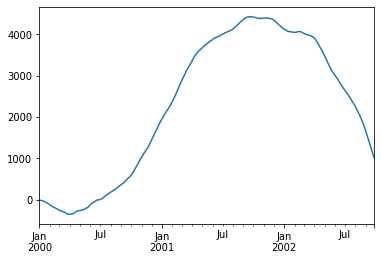

In [203]:
ts.plot() #On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [204]:
df = pd.DataFrame(
        np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
    )

In [205]:
df = df.cumsum()

In [206]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

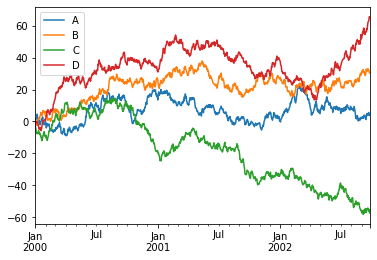

In [207]:
df.plot()

No handles with labels found to put in legend.


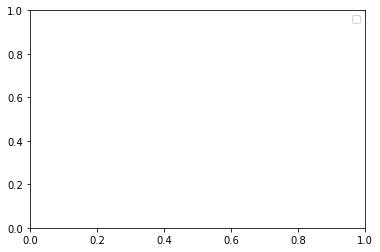

In [209]:
plt.legend(loc='best')

## Getting data in/out

### CSV

In [210]:
#Writing to a csv file.
df.to_csv("foo.csv")

In [211]:
#Reading from a csv file.
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.166189,0.442641,-2.825418,-1.292989
1,2000-01-02,1.188215,-0.374537,-3.430523,-1.609608
2,2000-01-03,1.557796,-0.846497,-4.718462,-0.885378
3,2000-01-04,1.681780,-2.222488,-6.539141,-0.337638
4,2000-01-05,1.659603,-1.627040,-7.031278,0.182936
...,...,...,...,...,...
995,2002-09-22,5.649467,32.465538,-56.475081,62.786536
996,2002-09-23,4.179968,31.368299,-55.109349,64.322719
997,2002-09-24,4.379566,30.543335,-55.968746,65.651516
998,2002-09-25,4.001007,30.251390,-55.754019,65.617578


### HDF5

In [212]:
#Writing to a HDF5 Store.
df.to_hdf("foo.h5", "df")

In [213]:
#Reading from a HDF5 Store.
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.166189,0.442641,-2.825418,-1.292989
2000-01-02,1.188215,-0.374537,-3.430523,-1.609608
2000-01-03,1.557796,-0.846497,-4.718462,-0.885378
2000-01-04,1.681780,-2.222488,-6.539141,-0.337638
2000-01-05,1.659603,-1.627040,-7.031278,0.182936
...,...,...,...,...
2002-09-22,5.649467,32.465538,-56.475081,62.786536
2002-09-23,4.179968,31.368299,-55.109349,64.322719
2002-09-24,4.379566,30.543335,-55.968746,65.651516
2002-09-25,4.001007,30.251390,-55.754019,65.617578


### Excel

In [215]:
#Writing to an excel file.
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [216]:
#Reading from an excel file.
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.166189,0.442641,-2.825418,-1.292989
1,2000-01-02,1.188215,-0.374537,-3.430523,-1.609608
2,2000-01-03,1.557796,-0.846497,-4.718462,-0.885378
3,2000-01-04,1.681780,-2.222488,-6.539141,-0.337638
4,2000-01-05,1.659603,-1.627040,-7.031278,0.182936
...,...,...,...,...,...
995,2002-09-22,5.649467,32.465538,-56.475081,62.786536
996,2002-09-23,4.179968,31.368299,-55.109349,64.322719
997,2002-09-24,4.379566,30.543335,-55.968746,65.651516
998,2002-09-25,4.001007,30.251390,-55.754019,65.617578


## Gotchas
f you are attempting to perform an operation you might see an exception like:

In [219]:
if pd.Series([False, True, False]):
     print("I was true")
#  Traceback
    
# ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().